### **Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos**

 **Angeles Arista Huerta** */  Agosto 26, 2022*

*Entrgea - Caso de negocios, módulo 1 - Estadística*

###### **DESCRIPCIÓN DEL CASO**
###### *Usted fue contratado como científico de datos en una importante empresa de fondos de inversión en el departamento de análisis financiero. La firma lleva varios años realizando análisis financieros y previsiones financieras. Le contrataron para que ideara enfoques alternativos para realizar análisis descriptivos con el fin de encontrar mejores alternativas futuras para los métodos de previsión.*

###### *Usted tiene que analizar los estados financieros trimestrales históricos de todas las firmas públicas estadounidenses que cotizan en la Bolsa de Nueva York y NASDAQ. Recibirá este conjunto de datos en formato .csv.*

#### *Procesamiento del dataset*
###### Importar librerias necesarias

In [117]:
import numpy as np              #Algebra lieal
import pandas as pd             #Procesamiento de datos
import matplotlib.pyplot as plt #Graficas/Visualizacion

###### Acceso al directorio

In [118]:
%cd "c:\Users\angix\Downloads\Estadistica"
#%ls 

[WinError 2] El sistema no puede encontrar el archivo especificado: 'c:\\Users\\angix\\Downloads\\Estadistica'
c:\Users\angix\Downloads\Statistics


###### Lectura de los archivos csv

In [119]:
firms = pd.read_csv("c:\\Users\\angix\\Downloads\\Statistics\\usfirms2022.csv")
#firms.head(3)

In [120]:
us = pd.read_csv("c:\\Users\\angix\\Downloads\\Statistics\\us2022q2a.csv")
#us.head(3)


###### Configuración de la visualización de datos a 3 decimales

In [121]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

###### Descripción de los datos

In [122]:
firms.info()
firms.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticker                       3608 non-null   object
 1   Name                         3608 non-null   object
 2   N                            3608 non-null   int64 
 3   Class                        3608 non-null   object
 4   Country
of Origin            3608 non-null   object
 5   Type of Asset                3608 non-null   object
 6   Sector NAICS
level 1         3608 non-null   object
 7   Exchange / Src               3608 non-null   object
 8   Sector
Economatica           3608 non-null   object
 9   Sector NAICS
last available  3608 non-null   object
 10  partind                      3608 non-null   object
dtypes: int64(1), object(10)
memory usage: 310.2+ KB


,N
count,3608.000
mean,1804.500
std,1041.684
min,1.000
25%,902.750
50%,1804.500
75%,2706.250
max,3608.000


In [123]:
us.info()
us.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324447 entries, 0 to 324446
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   firm               324446 non-null  object 
 1   q                  324446 non-null  object 
 2   revenue            158614 non-null  float64
 3   cogs               158309 non-null  float64
 4   sgae               158309 non-null  float64
 5   otheropexp         158311 non-null  float64
 6   extraincome        158613 non-null  float64
 7   finexp             158614 non-null  float64
 8   incometax          158614 non-null  float64
 9   totalassets        159808 non-null  float64
 10  totalliabilities   159808 non-null  float64
 11  shortdebt          129677 non-null  float64
 12  longdebt           159595 non-null  float64
 13  stockholderequity  159740 non-null  float64
 14  adjprice           159154 non-null  float64
 15  originalprice      159234 non-null  float64
 16  sh

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
count,158614.000,158309.000,158309.000,158311.000,158613.000,158614.000,158614.000,159808.000,159808.000,129677.000,159595.000,159740.000,159154.000,159234.000,157822.000,159814.000,324446.000,324446.000
mean,1452992.639,801464.718,420278.553,40350.486,-14613.885,20418.493,41498.806,16670755.635,13152678.383,428951.751,2959733.848,3518161.935,3887.274,142.157,201184.385,7.448,2010.755,2.478
std,5403175.803,3747464.594,1740520.321,767107.107,548720.221,112823.183,331055.653,102736719.101,91956192.276,4603231.586,14951964.609,14174529.059,352358.129,4835.897,692298.844,3.346,6.499,1.118
min,-4788351.000,-4460800.000,-3373000.000,-6967000.000,-41491000.000,-3439000.000,-35645000.000,0.000,0.000,-15006.000,0.000,-90520000.000,0.012,0.003,0.000,0.000,2000.000,1.000
25%,33798.500,228.000,9332.000,0.000,-2140.000,0.000,0.000,366402.500,140720.750,0.000,7000.000,123710.250,9.910,11.160,25080.964,3.000,2005.000,1.000
50%,205175.345,43823.000,56367.000,0.000,0.000,795.000,2493.000,1711736.000,989997.500,6452.000,255000.000,568157.000,20.859,25.800,55895.352,6.000,2011.000,2.000
75%,860000.000,370718.000,217920.000,33.000,697.572,13000.000,20184.750,6618525.250,4359461.750,81827.000,1503723.500,1975248.250,42.290,49.040,144209.075,9.000,2016.000,3.000
max,152871008.000,115522000.000,131662000.000,69018000.000,129197000.000,6955000.000,39186000.000,3954687000.000,3668788000.000,300279000.000,511653000.000,508141000.000,70117187.500,528921.000,98214051.000,12.000,2022.000,4.000


#### *Limpieza y modificación de datos*

1. Verificar que no existan datos nulos, duplicados

2. Si no impacta en la dataset, eliminarlos o modificarlos

3. Verificar los cambios



###### Datos nulos en el csv

In [124]:
us.isna().sum() 
us.isnull().sum()

firm                      1
q                         1
revenue              165833
cogs                 166138
sgae                 166138
otheropexp           166136
extraincome          165834
finexp               165833
incometax            165833
totalassets          164639
totalliabilities     164639
shortdebt            194770
longdebt             164852
stockholderequity    164707
adjprice             165293
originalprice        165213
sharesoutstanding    166625
fiscalmonth          164633
year                      1
cto                       1
dtype: int64

###### Eliminar datos nulos

In [125]:
us = us.drop(index=324446,axis=0) #Eliminar fila con datos nulos

###### Verificar cambios

In [126]:
us.isna().sum() 

firm                      0
q                         0
revenue              165832
cogs                 166137
sgae                 166137
otheropexp           166135
extraincome          165833
finexp               165832
incometax            165832
totalassets          164638
totalliabilities     164638
shortdebt            194769
longdebt             164851
stockholderequity    164706
adjprice             165292
originalprice        165212
sharesoutstanding    166624
fiscalmonth          164632
year                      0
cto                       0
dtype: int64

###### Datos duplicados en el csv

In [127]:
us[us.duplicated()]

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto


###### Identificación de outliers

<AxesSubplot:ylabel='Frequency'>

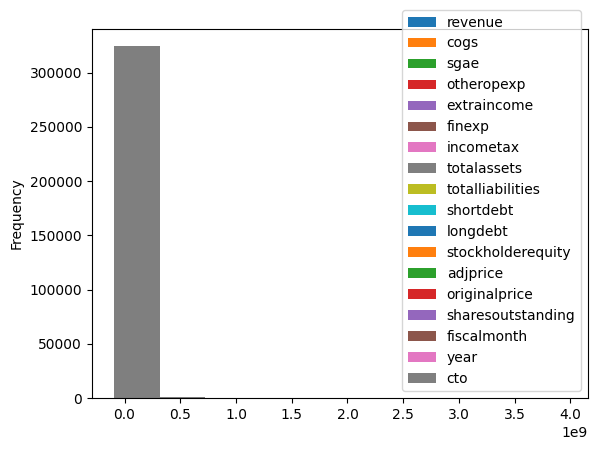

In [128]:
us.plot.hist()

#### *Analisis del dataset*

***Preguntas Generales***

>###### Por industria, ¿cuál es la composición de las empresas públicas estadounidenses en términos de tamaño de la empresa, rendimiento de las ventas y rentabilidad?
###### **RESPUESTA.**

>###### ¿Por qué algunas empresas son más rentables que otras? ¿Qué factores/variables de los estados financieros están relacionados con los rendimientos de las acciones?
###### **RESPUESTA.**

***Preguntas Especificas***

*Estadistica descriptiva*

Considerando el trimestre financiero más reciente del conjunto de datos:

>###### Mostrar cuántas empresas por industria hay en la muestra

In [129]:
countFirms = firms['Sector NAICS\nlevel 1'].value_counts()
countFirms

Manufacturing                                                               1567
Finance and Insurance                                                        703
Information                                                                  263
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                104
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               69
Real Estate and Rental and Leasing                                            68
Health Care and Social Assis

>###### Para cada sector (y para todos los sectores), ¿qué puede decir sobre el tamaño típico de la empresa en términos de valor de mercado y valor contable? ¿Cuánto cambian estas variables dentro de cada industria? ¿Cómo se distribuye el tamaño de la empresa (en valor de mercado)?
###### **RESPUESTA.**

In [130]:
counts.describe()

count     19.000
mean     189.895
std      368.178
min        2.000
25%       33.500
50%       69.000
75%      139.000
max     1567.000
Name: Sector NAICS\nlevel 1, dtype: float64

###### **hist** (*self, by=by, ax=ax, grid=grid, xlabelsize=xlabelsize, xrot=xrot, ylabelsize=ylabelsize, yrot=yrot, figsize=figsize, bins=bins, legend=legend*)

<AxesSubplot:>

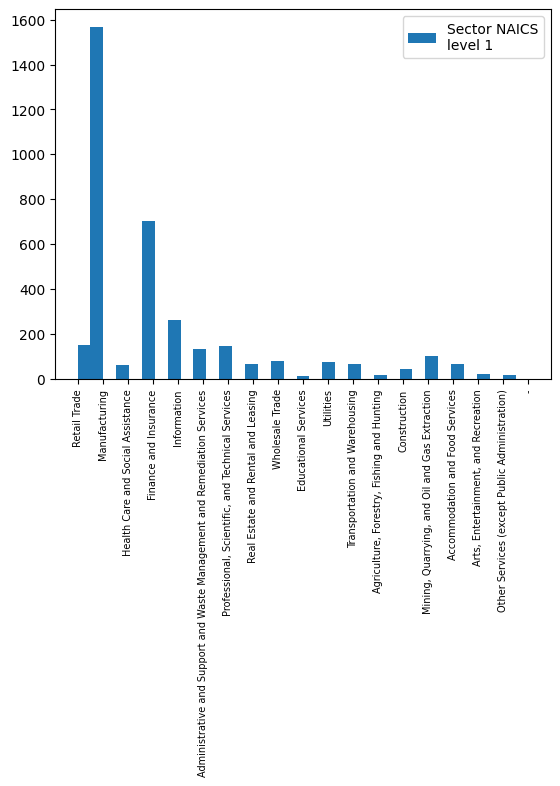

In [131]:
firms['Sector NAICS\nlevel 1'].hist(grid=False, xlabelsize=7, xrot=90, bins = 35, legend=1)

In [132]:
US_Firms = firms.merge(us, left_on='Ticker', right_on='firm')
#US_Firms = us.merge(firms, left_on='firm', right_on='Ticker')
US_Firms.head(3)

,Ticker,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-,FLWS,2000q1,85045.000,54143.000,52146.000,0.000,111.000,-1600.000,-268.000,248461.000,76657.000,4380.000,8869.000,171804.000,7.125,7.125,64097.913,9.000,2000.000,1.000
1,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-,FLWS,2000q2,123288.000,75607.000,63201.000,0.000,27.000,-2164.000,-419.000,224641.000,65723.000,1839.000,9441.000,158918.000,5.125,5.125,64170.913,12.000,2000.000,2.000
2,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-,FLWS,2000q3,72516.000,45091.000,51590.000,0.000,88.000,-1576.000,0.000,211449.000,75163.000,7654.000,10916.000,136286.000,4.984,4.984,64185.913,3.000,2000.000,3.000


###### **Firm Size Measures:**
###### *Book value of the firm* = (TotalAssets - TotalLiabilities)
###### *Market value* = (OriginalPrice * SharesOutStanding)              Precio del stock historico

In [133]:
US_Firms['Book Value of the Firms'] = US_Firms['totalassets'] - US_Firms['totalliabilities']
US_Firms['Market Value'] = US_Firms['originalprice'] * US_Firms['sharesoutstanding']
US_Firms.head(1)

,Ticker,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Book Value of the Firms,Market Value
0,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-,FLWS,2000q1,85045.000,54143.000,52146.000,0.000,111.000,-1600.000,-268.000,248461.000,76657.000,4380.000,8869.000,171804.000,7.125,7.125,64097.913,9.000,2000.000,1.000,171804.000,456697.630


###### **Profit Margin Measures:**
###### *Operating Profit* = (Revenue - Cogs - Sgae) 
###### ---//Cogst-Costos Variables //Sgae-Costos fijos
###### *Operating Profit Margin (OPM)* = (Ebit / Revenue)             
###### *Profit margin* = (NetIncome / revenue)               
###### *Net Income* = (Ebit - Incometax - Finexp)       
###### ---//Incometax-Impuesto sobre la renta //Finexp-Gastos financieros                

In [134]:
US_Firms['Operating Profit'] = US_Firms['revenue'] - US_Firms['cogs'] - US_Firms['sgae'] - US_Firms['otheropexp']
US_Firms['OPM'] = US_Firms['Operating Profit'] / US_Firms['revenue']
US_Firms['Net Income'] = US_Firms['Operating Profit'] - US_Firms['incometax'] - US_Firms['finexp']
US_Firms['Profit Margin'] = US_Firms['Net Income'] / US_Firms['revenue']
US_Firms.head(1)

,Ticker,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Book Value of the Firms,Market Value,Operating Profit,OPM,Net Income,Profit Margin
0,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-,FLWS,2000q1,85045.000,54143.000,52146.000,0.000,111.000,-1600.000,-268.000,248461.000,76657.000,4380.000,8869.000,171804.000,7.125,7.125,64097.913,9.000,2000.000,1.000,171804.000,456697.630,-21244.000,-0.250,-19376.000,-0.228


In [135]:
US_Q2 = US_Firms[US_Firms['q'] == '2022q2']
US_Q2.head(3)

,Ticker,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Book Value of the Firms,Market Value,Operating Profit,OPM,Net Income,Profit Margin
89,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-,FLWS,2022q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.510,9.510,64555.991,NaN,2022.000,2.000,NaN,613927.474,NaN,NaN,NaN,NaN
179,TXG,"10x Genomics, Inc",2,Com A,US,Stock,Manufacturing,NASDAQ,Electric Electron,"Navigational, Measuring, Electromedical, and C...",-,TXG,2022q2,114609.000,27704.000,150022.000,0.000,-1843.000,-1129.000,627.000,1001591.000,218075.000,7977.000,91040.000,783516.000,45.250,45.250,113371.945,6.000,2022.000,2.000,783516.000,5130080.511,-63117.000,-0.551,-62615.000,-0.546
269,GOED,1847 Goedeker Inc,3,Com,US,Stock,Retail Trade,AMEX,Trade,Furniture and Home Furnishings Stores,-,GOED,2022q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.220,1.220,106387.332,NaN,2022.000,2.000,NaN,129792.545,NaN,NaN,NaN,NaN


In [136]:
US_Q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3600 entries, 89 to 323815
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ticker                       3600 non-null   object 
 1   Name                         3600 non-null   object 
 2   N                            3600 non-null   int64  
 3   Class                        3600 non-null   object 
 4   Country
of Origin            3600 non-null   object 
 5   Type of Asset                3600 non-null   object 
 6   Sector NAICS
level 1         3600 non-null   object 
 7   Exchange / Src               3600 non-null   object 
 8   Sector
Economatica           3600 non-null   object 
 9   Sector NAICS
last available  3600 non-null   object 
 10  partind                      3600 non-null   object 
 11  firm                         3600 non-null   object 
 12  q                            3600 non-null   object 
 13  revenue        

In [137]:
US_Q2.isna().sum() 

Ticker                            0
Name                              0
N                                 0
Class                             0
Country\nof Origin                0
Type of Asset                     0
Sector NAICS\nlevel 1             0
Exchange / Src                    0
Sector\nEconomatica               0
Sector NAICS\nlast available      0
partind                           0
firm                              0
q                                 0
revenue                         245
cogs                            245
sgae                            245
otheropexp                      245
extraincome                     245
finexp                          245
incometax                       245
totalassets                     238
totalliabilities                238
shortdebt                       798
longdebt                        239
stockholderequity               238
adjprice                         18
originalprice                    18
sharesoutstanding           

In [138]:
US_Q2_na = US_Q2.dropna()
US_Q2_na.head(3)

,Ticker,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Book Value of the Firms,Market Value,Operating Profit,OPM,Net Income,Profit Margin
179,TXG,"10x Genomics, Inc",2,Com A,US,Stock,Manufacturing,NASDAQ,Electric Electron,"Navigational, Measuring, Electromedical, and C...",-,TXG,2022q2,114609.000,27704.000,150022.000,0.000,-1843.000,-1129.000,627.000,1001591.000,218075.000,7977.000,91040.000,783516.000,45.250,45.250,113371.945,6.000,2022.000,2.000,783516.000,5130080.511,-63117.000,-0.551,-62615.000,-0.546
359,ONEM,"1life Healthcare, Inc",4,Com,US,Stock,Health Care and Social Assistance,NASDAQ,Other,Offices of Physicians,-,ONEM,2022q2,255839.000,215848.000,137398.000,0.000,-3682.000,-364.000,-6916.000,2540919.000,916437.000,36465.000,602378.000,1624482.000,7.840,7.840,194047.510,6.000,2022.000,2.000,1624482.000,1521332.478,-97407.000,-0.381,-90127.000,-0.352
539,DIBS,"1stdibs.Com, Inc",6,Com,US,Stock,Retail Trade,NASDAQ,Trade,Electronic Shopping and Mail-Order Houses,-,DIBS,2022q2,24576.000,7953.000,25352.000,-8109.000,163.000,-168.000,0.000,212092.000,55725.000,2700.000,23133.000,156367.000,5.690,5.690,38067.054,6.000,2022.000,2.000,156367.000,216601.537,-620.000,-0.025,-452.000,-0.018


<AxesSubplot:>

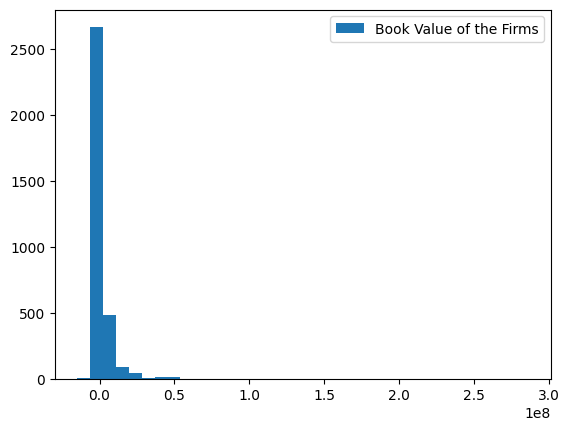

In [139]:
US_Q2['Book Value of the Firms'].hist( grid=False, bins=35, legend=1)
#US_Q2['Book Value of the Firms'].plot()

###### **SE OBTIENE EL VALOR DE LA MEDIANA PARA OBTENER INFORMACIÓN, YA QUE SE TIENEN DEMASIADOS VALORES NULOS PARA OBTENER INFORMACIÓN DE LA MEDIA**

In [140]:
US_Q2['Book Value of the Firms'].median()

457737.0

>###### Para cada sector (y para todos los sectores), ¿qué puede decir sobre el margen de beneficio de las empresas? mostrar a) estadísticas descriptivas del margen de beneficios y b) gráfico(s) para ilustrar cómo cambia el margen de beneficios entre las industrias.
###### **RESPUESTA.**

>###### ¿Cuáles son las 10 empresas estadounidenses más grandes en términos de valor de mercado y a qué distancia están del tamaño típico de una empresa estadounidense?
###### **RESPUESTA.**

>###### ¿Cuáles son las 10 empresas estadounidenses más importantes en términos de valor contable y a qué distancia están del tamaño típico de una empresa estadounidense?
###### **RESPUESTA.**

Considerando todo el historial de datos financieros de todas las empresas:

>###### ¿Cómo se puede medir la rentabilidad de las empresas que se puede utilizar para comparar el rendimiento entre empresas de diferentes tamaños? Seleccionar y justificar al menos 3 medidas y mostrar estadísticas descriptivas
###### **RESPUESTA.**

>###### Calcular y explicar las ganancias por acción deflactadas por precio.
###### **RESPUESTA.**

*Modelado estadistico*

Seleccionar un grupo de empresas de acuerdo con su clasificación general de la industria: ***Industrias de servicios***

Utilizando su subconjunto de empresas que pertenecen a su sector, ¿qué factores (variables) podrían estar relacionados con la rentabilidad anual de las acciones en un trimestre en el futuro? Seleccione al menos 3 factores y explique brevemente. ¿por qué cree que podrían estar relacionados con la rentabilidad de las acciones?.
###### **RESPUESTA.**

>###### Realice histogramas para cada factor/variable e interpretarlos
###### **RESPUESTA.**

>###### Realice trazados para visualizar la posible relación que cada factor podría tener con la variable dependiente.
###### **RESPUESTA.**

>###### Mostrar estadísticas descriptivas de estos factores.
###### **RESPUESTA.**

> Diseñe y ejecute un modelo de regresión múltiple para examinar si los factores seleccionados y las ganancias por acción deflactadas por precio pueden explicar/predecir las ganancias anuales de las acciones. Usted tiene que controlar para la industria y el tamaño de la firma. Para controlar estas variables, debe incluirlas como variables independientes adicionales en el modelo.
###### **RESPUESTA.**

>###### Las variables independientes deben estar en la escala correcta para poder comparar los valores de las variables entre diferentes firmas de cualquier tamaño.
###### **RESPUESTA.**

>###### Para cada variable independiente debe comprobar si hay valores atípicos y realizar los ajustes correspondientes para evitar resultados no fiables en el modelo de regresión.
###### **RESPUESTA.**

>###### Debe comprobar si existen posibles problemas de multicolinealidad. Explique brevemente qué es multicolinealidad, ejecute e interprete la prueba correspondiente.
###### **RESPUESTA.**

> Interpretar el modelo

>###### Interpretar los resultados de cada coeficiente (beta y su significación estadística)
###### **RESPUESTA.**

>###### Interpretar el R-cuadrado del modelo
###### **RESPUESTA.**

> Ajustes a su modelo. Si hay una o más variables independientes (factores o variables de control) que no son significativas, elimínelas del modelo. Usted tiene que ejecutar e interpretar su modelo final.